In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import cloudpickle
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV,KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer


from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from scipy.stats import randint, uniform


In [2]:
!pip install cloudpickle


In [3]:
import warnings
warnings.filterwarnings('ignore')


In [4]:
df=pd.read_csv('BiocharDS.csv', encoding='latin1')

In [5]:
df.head()

,StudyID,Experiment ID,Author,Title,Year_Publication,Country,Longitude,Latitude,ClimateZone,Temperature,...,GWP_LNRR,GHGI_CK,GHGI_CK_SD,GHGI_CK_N,GHGI_T,GHGI_T _SD,GHGI_T _N,GHGI_RR,GHGI_LNRR,Unnamed: 209
0,1,1_1,A.O. Adekiya,Effects of biochar and poultry manure on soil ...,2019,Nigeria,6.02,8.15,Tropic,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1_1,A.O. Adekiya,Effects of biochar and poultry manure on soil ...,2019,Nigeria,6.02,8.15,Tropic,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1_1,A.O. Adekiya,Effects of biochar and poultry manure on soil ...,2019,Nigeria,6.02,8.15,Tropic,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1_1,A.O. Adekiya,Effects of biochar and poultry manure on soil ...,2019,Nigeria,6.02,8.15,Tropic,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1_1,A.O. Adekiya,Effects of biochar and poultry manure on soil ...,2019,Nigeria,6.02,8.15,Tropic,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(2438, 210)

In [7]:
df.describe()

,StudyID,Year_Publication,Longitude,Latitude,Temperature,Precipitation,WetnessIndex,SOC_initial,TN_initial,TP_initial,...,GWP_LNRR,GHGI_CK,GHGI_CK_SD,GHGI_CK_N,GHGI_T,GHGI_T _SD,GHGI_T _N,GHGI_RR,GHGI_LNRR,Unnamed: 209
count,2438.000000,2438.000000,2438.000000,2438.000000,1383.000000,1606.000000,1359.000000,1910.000000,1649.000000,399.000000,...,541.000000,413.000000,413.000000,480.000000,422.000000,413.000000,419.000000,413.000000,413.000000,0.0
mean,172.984413,2017.152994,86.286210,29.207592,15.394346,993.033985,39.191060,13.657817,1.319005,0.640376,...,-0.136285,767.601090,47.914358,3.108333,538.092536,34.705642,3.138425,0.954843,-0.269516,NaN
std,103.136856,4.308856,61.841494,17.172550,5.837778,536.988938,16.816852,8.903364,0.809991,0.479314,...,0.719343,4209.833069,224.471883,0.711326,2948.674684,165.757210,0.785593,0.949832,0.629267,NaN
min,1.000000,2001.000000,-155.690000,-43.650000,1.500000,45.000000,1.570000,1.260000,0.010000,0.070000,...,-4.140000,3.910000,0.040000,3.000000,2.410000,0.010000,3.000000,0.050000,-3.080000,NaN
25%,81.000000,2014.000000,85.180000,28.220000,12.650000,553.575000,26.090000,7.810000,0.800000,0.450000,...,-0.410000,46.520000,2.220000,3.000000,32.887500,1.640000,3.000000,0.600000,-0.510000,NaN
50%,167.000000,2019.000000,113.350000,32.040000,14.800000,930.000000,41.500000,11.400000,1.120000,0.550000,...,-0.120000,137.200000,7.800000,3.000000,115.505000,6.370000,3.000000,0.740000,-0.300000,NaN
75%,257.000000,2021.000000,119.170000,37.800000,17.500000,1330.000000,47.510000,18.205000,1.800000,0.620000,...,0.150000,506.270000,31.500000,3.000000,402.247500,23.480000,3.000000,0.970000,-0.030000,NaN
max,367.000000,2023.000000,172.460000,62.500000,32.000000,2870.000000,116.360000,81.200000,10.220000,3.620000,...,2.710000,81496.450000,4074.820000,12.000000,58261.780000,2913.090000,12.000000,11.260000,2.420000,NaN


In [8]:
#delete meta data columns- not needed in prediction
metadata_cols = [
    'StudyID',
    'Experiment ID',
    'Author',
    'Title',
    'Year_Publication',
    'Unnamed: 209'
]

df = df.drop(columns=metadata_cols, errors='ignore')


In [9]:
df.shape

(2438, 204)

In [10]:
# Drop columns by suffix pattern
drop_suffixes = ('_SD', '_N', '_RR', '_LNRR','_CK')

# Keep only columns that do NOT end with any of the drop_suffixes
df = df[[col for col in df.columns if not col.endswith(drop_suffixes)]]


In [11]:
df.shape

(2438, 57)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2438 non-null   object 
 1   Longitude                     2438 non-null   float64
 2   Latitude                      2438 non-null   float64
 3   ClimateZone                   2438 non-null   object 
 4   Temperature                   1383 non-null   float64
 5   Precipitation                 1606 non-null   float64
 6   WetnessIndex                  1359 non-null   float64
 7   SOC_initial                   1910 non-null   float64
 8   TN_initial                    1649 non-null   float64
 9   TP_initial                    399 non-null    float64
 10  NH4_N_initial                 211 non-null    object 
 11  NO3_N_initial                 160 non-null    float64
 12  OlsenP_initial                858 non-null    object 
 13  pH_

In [13]:
df.describe()

,Longitude,Latitude,Temperature,Precipitation,WetnessIndex,SOC_initial,TN_initial,TP_initial,NO3_N_initial,pH_initial,...,Na_T,pH_T,SMBC_T,SMBN_T,CropYield_T,CO2_T,CH4_T,N2O_T,GWP_T,GHGI_T
count,2438.000000,2438.000000,1383.000000,1606.000000,1359.000000,1910.000000,1649.000000,399.000000,160.000000,2041.000000,...,185.000000,1013.000000,148.000000,91.000000,1984.000000,217.000000,253.000000,486.000000,543.000000,422.000000
mean,86.286210,29.207592,15.394346,993.033985,39.191060,13.657817,1.319005,0.640376,17.439125,6.513626,...,5.796000,6.653248,350.235203,45.319341,11.614264,6723.400968,41.760514,3.058580,3776.381326,538.092536
std,61.841494,17.172550,5.837778,536.988938,16.816852,8.903364,0.809991,0.479314,21.092715,1.347741,...,14.211361,1.344463,255.270718,26.636559,21.737498,9970.901062,76.910136,5.694021,7299.741807,2948.674684
min,-155.690000,-43.650000,1.500000,45.000000,1.570000,1.260000,0.010000,0.070000,0.500000,3.700000,...,0.010000,3.360000,0.000000,3.560000,0.130000,2.120000,-3.000000,-2.450000,-730.100000,2.410000
25%,85.180000,28.220000,12.650000,553.575000,26.090000,7.810000,0.800000,0.450000,4.960000,5.500000,...,0.800000,5.570000,145.550000,26.385000,3.557500,1303.000000,0.140000,0.440000,327.000000,32.887500
50%,113.350000,32.040000,14.800000,930.000000,41.500000,11.400000,1.120000,0.550000,12.000000,6.310000,...,1.700000,6.650000,254.315000,36.000000,7.050000,3155.230000,9.230000,1.120000,1040.020000,115.505000
75%,119.170000,37.800000,17.500000,1330.000000,47.510000,18.205000,1.800000,0.620000,23.900000,7.800000,...,4.400000,7.880000,547.767500,59.050000,10.150000,7710.000000,49.460000,2.977500,3890.580000,402.247500
max,172.460000,62.500000,32.000000,2870.000000,116.360000,81.200000,10.220000,3.620000,156.860000,9.340000,...,97.400000,9.180000,1129.500000,115.740000,268.120000,60060.000000,605.000000,41.500000,62340.100000,58261.780000


In [14]:
#removing extra spaces from column name
df.columns = df.columns.str.strip()

In [15]:
# Convert 'NH4_N_initial' and 'OlsenP_initial' to float
df['NH4_N_initial'] = pd.to_numeric(df['NH4_N_initial'], errors='coerce')
df['OlsenP_initial'] = pd.to_numeric(df['OlsenP_initial'], errors='coerce')

# Check the data types to confirm the conversion
print(df[['NH4_N_initial', 'OlsenP_initial']].dtypes)


NH4_N_initial     float64
OlsenP_initial    float64
dtype: object


In [16]:
original_len = len(df)
df = df.drop_duplicates()
new_len = len(df)

print(f"Duplicates removed: {original_len - new_len}")


Duplicates removed: 4


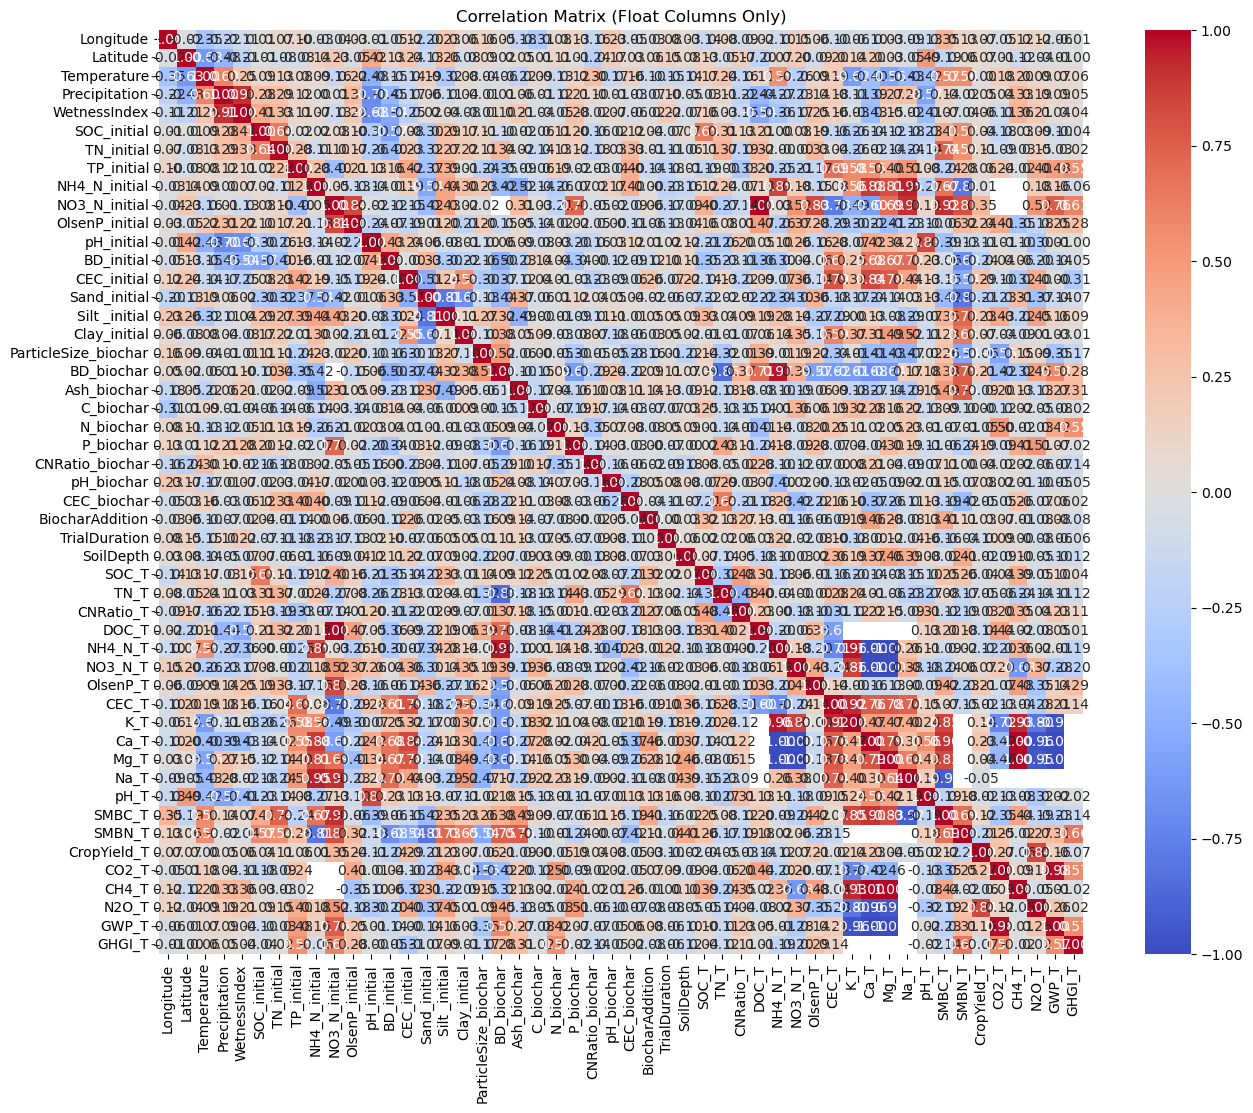

In [17]:
# Select only float-type columns
float_df = df.select_dtypes(include='float')

# Compute correlation matrix
corr_matrix = float_df.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix (Float Columns Only)")
plt.show()


In [18]:
corr_with_yield = corr_matrix['CropYield_T'].sort_values(ascending=False)
print(corr_with_yield)


CropYield_T             1.000000
N2O_T                   0.836652
NO3_N_initial           0.348002
CEC_initial             0.285844
CO2_T                   0.266780
OlsenP_initial          0.236596
Silt _initial           0.231548
Ca_T                    0.230028
OlsenP_T                0.212077
BD_biochar              0.210448
P_biochar               0.190371
GWP_T                   0.156043
K_T                     0.136695
SMBC_T                  0.123644
TN_initial              0.108070
pH_biochar              0.084117
NO3_N_T                 0.073386
Latitude                0.072633
Clay_initial            0.070426
Longitude               0.066343
TP_initial              0.061018
WetnessIndex            0.059071
Precipitation           0.046237
Mg_T                    0.040674
CNRatio_biochar         0.040304
SOC_initial             0.037002
BiocharAddition         0.032808
NH4_N_initial           0.008039
Temperature             0.003573
C_biochar               0.002940
SoilDepth 

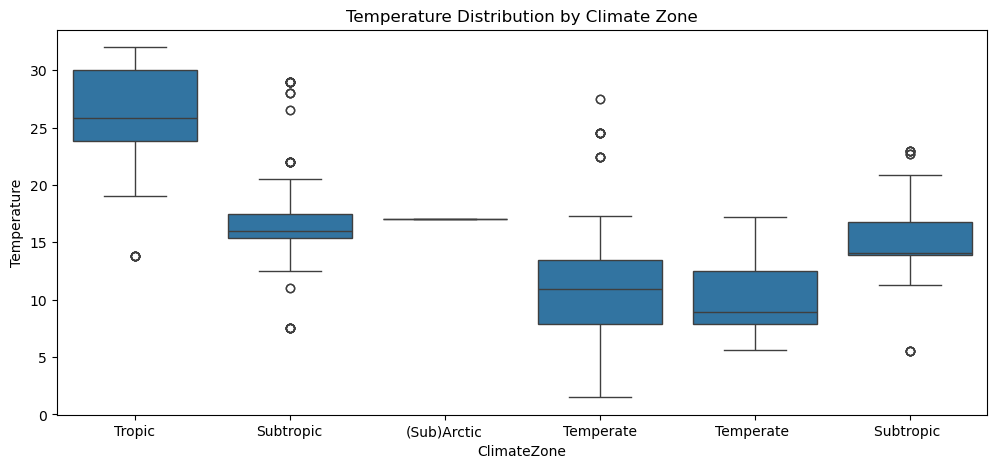

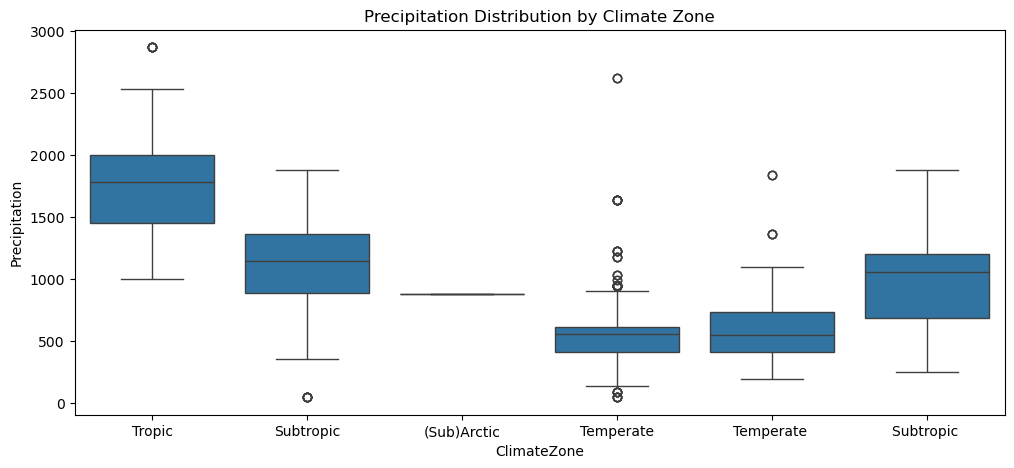

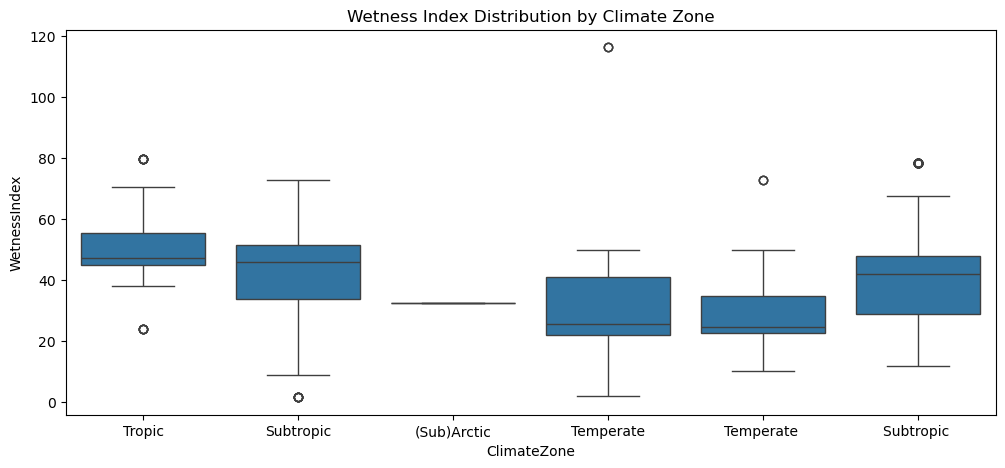

In [19]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='ClimateZone', y='Temperature', data=df)
plt.title('Temperature Distribution by Climate Zone')
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x='ClimateZone', y='Precipitation', data=df)
plt.title('Precipitation Distribution by Climate Zone')
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x='ClimateZone', y='WetnessIndex', data=df)
plt.title('Wetness Index Distribution by Climate Zone')
plt.show()


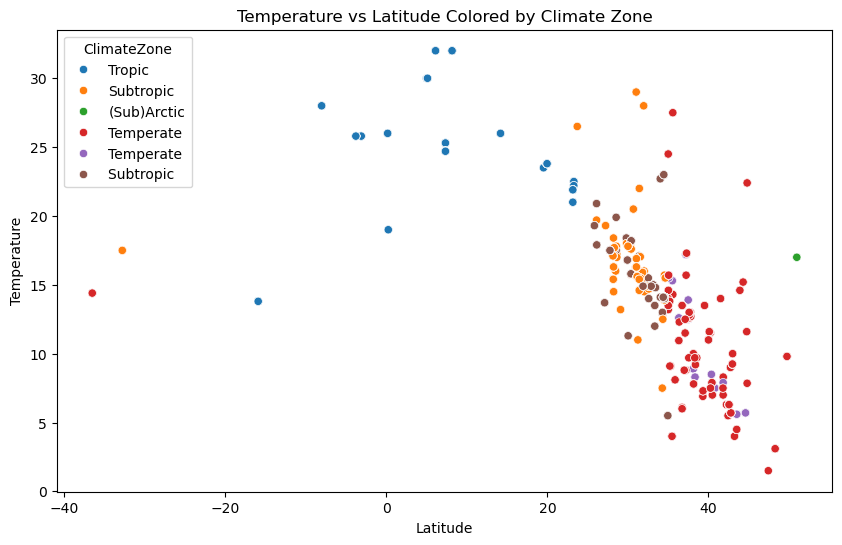

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Latitude', y='Temperature', hue='ClimateZone', data=df)
plt.title("Temperature vs Latitude Colored by Climate Zone")
plt.show()


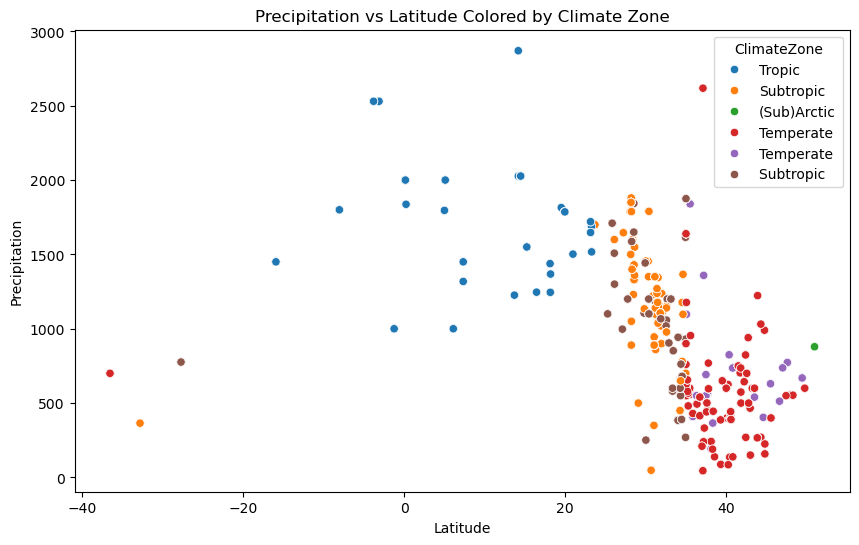

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Latitude', y='Precipitation', hue='ClimateZone', data=df)
plt.title("Precipitation vs Latitude Colored by Climate Zone")
plt.show()

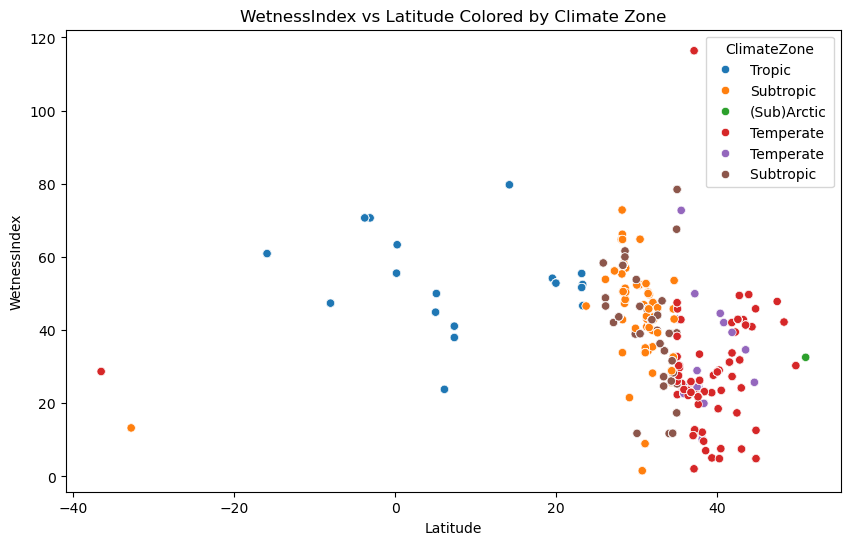

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Latitude', y='WetnessIndex', hue='ClimateZone', data=df)
plt.title("WetnessIndex vs Latitude Colored by Climate Zone")
plt.show()

In [23]:
correlation = df[['Precipitation', 'WetnessIndex']].corr() 
print(correlation)


               Precipitation  WetnessIndex
Precipitation       1.000000      0.910246
WetnessIndex        0.910246      1.000000


In [24]:
df = df.drop(columns=['WetnessIndex'])

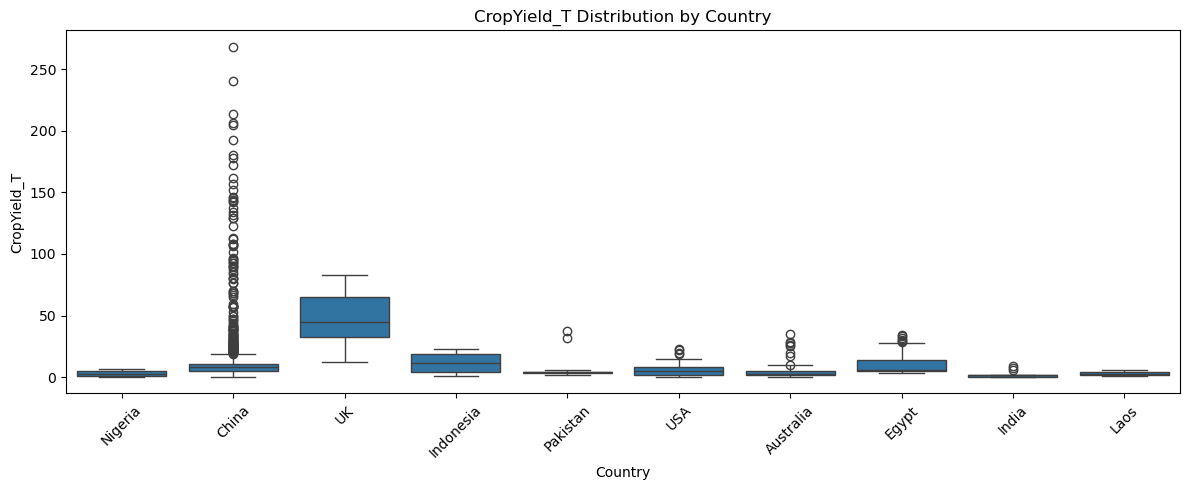

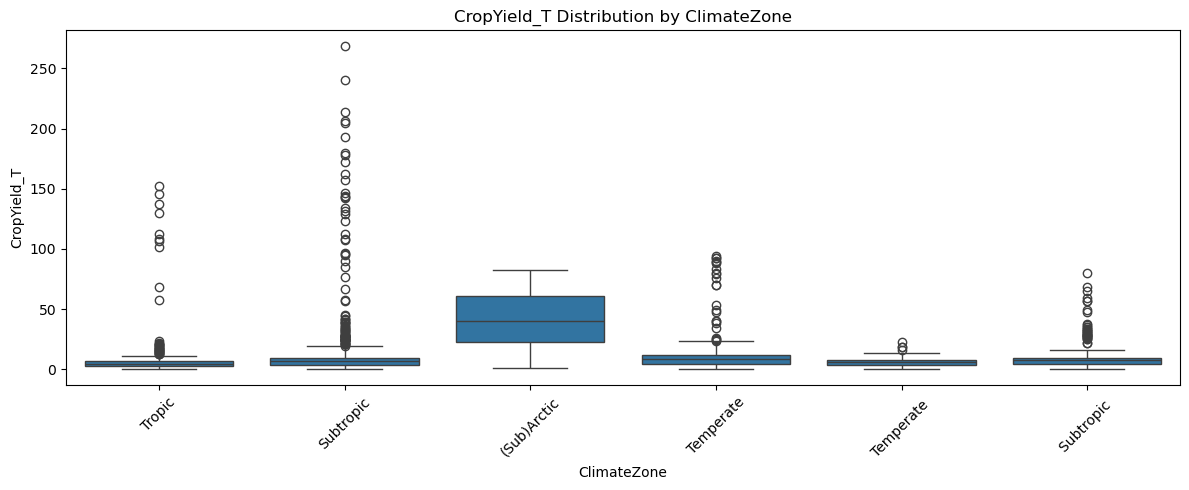

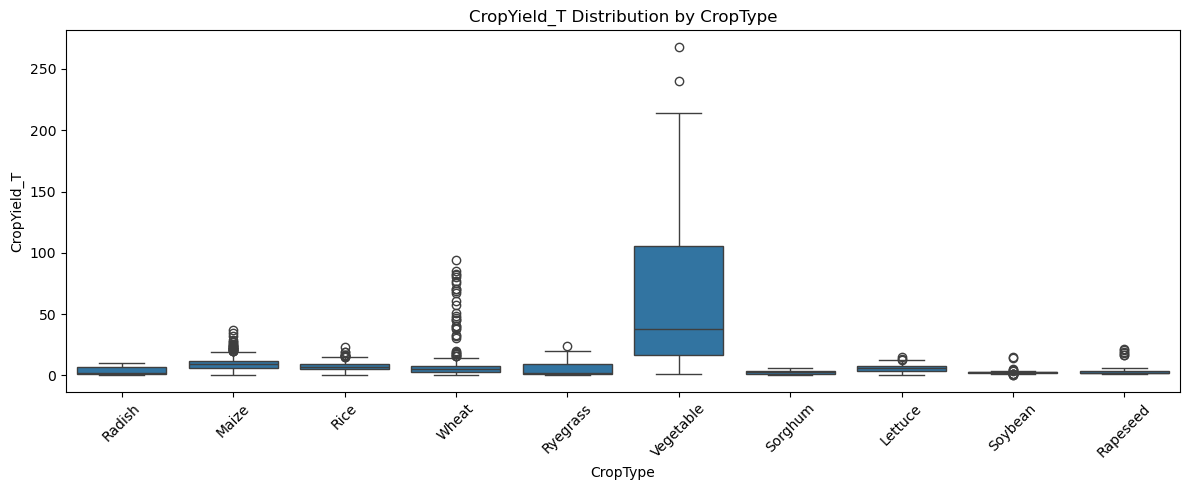

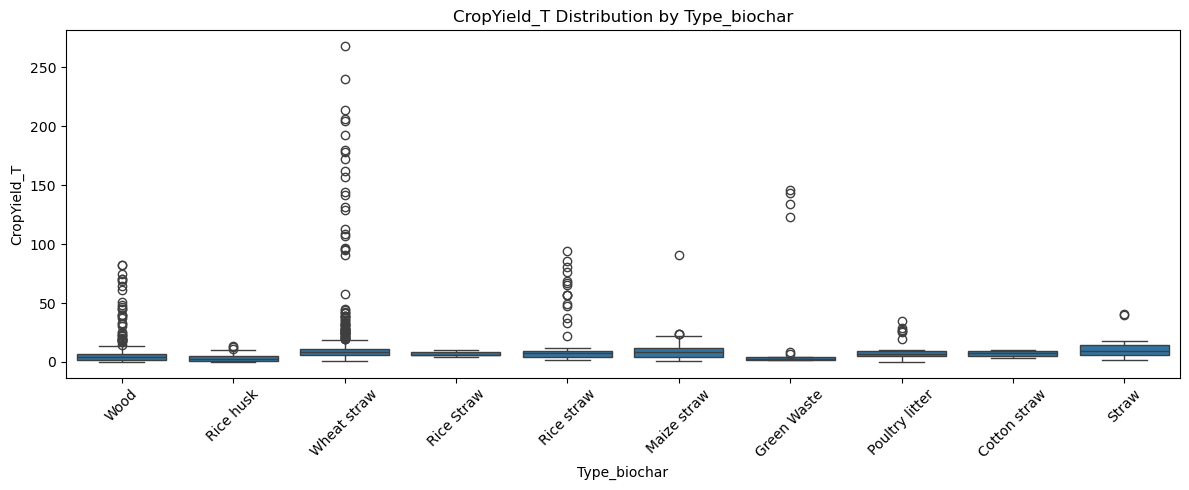

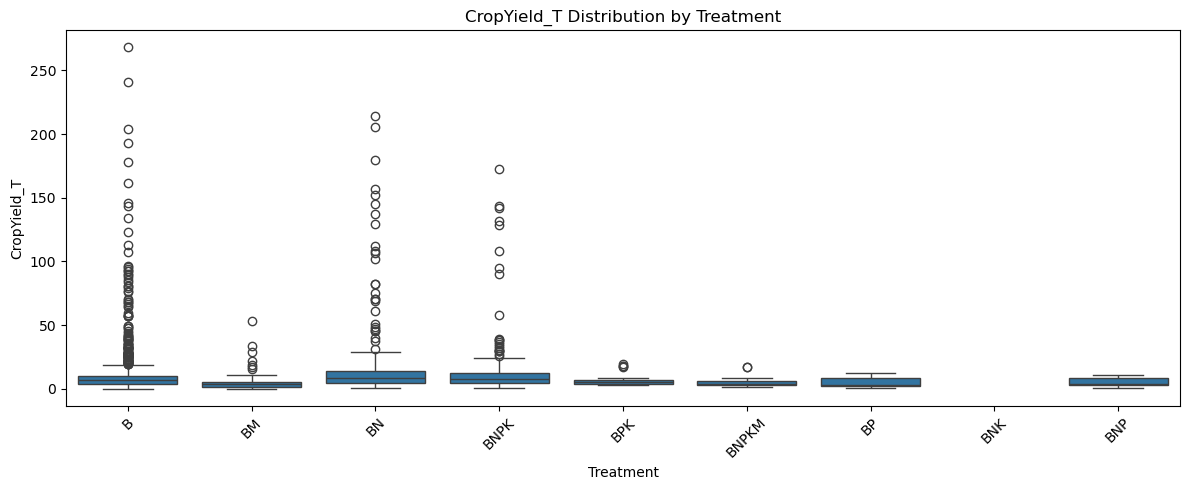

In [25]:
# Crop Yield vs Categorical Features (boxplots)
important_cats = ['Country', 'ClimateZone', 'CropType', 'Type_biochar', 'Treatment']

for col in important_cats:
    if col in df.columns:
        plt.figure(figsize=(12, 5))
        top_vals = df[col].value_counts().nlargest(10).index
        sns.boxplot(data=df[df[col].isin(top_vals)], x=col, y='CropYield_T')
        plt.title(f'CropYield_T Distribution by {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


In [26]:
climate_means = df.groupby('ClimateZone')[['Temperature', 'Precipitation']].median()
print(climate_means)



             Temperature  Precipitation
ClimateZone                            
(Sub)Arctic        17.00          879.0
Subtropic          16.00         1145.0
Subtropic          14.10         1058.0
Temperate          10.95          553.0
Temperate           8.90          550.0
Tropic             25.80         1786.0


In [27]:
# Define the columns to fill and the grouping key
weather_cols = ['Temperature', 'Precipitation']
group_col = 'ClimateZone'

# Fill missing values with group-wise median
for col in weather_cols:
    if col in df.columns:
        df[col] = df.groupby(group_col)[col].transform(lambda x: x.fillna(x.median()))

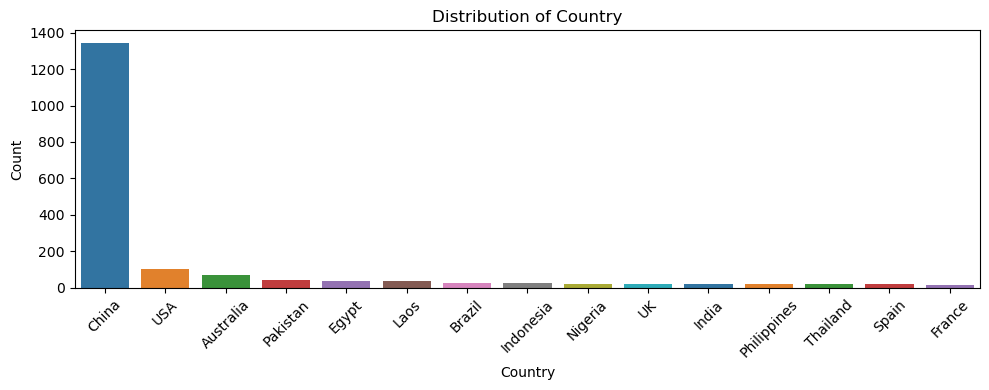

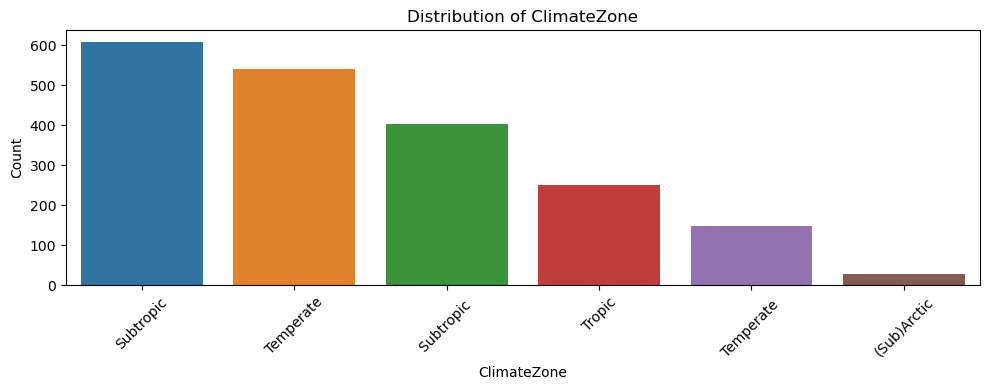

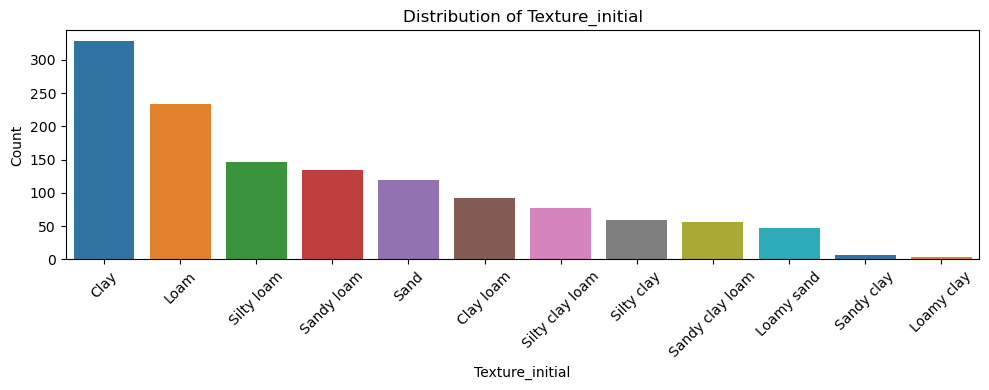

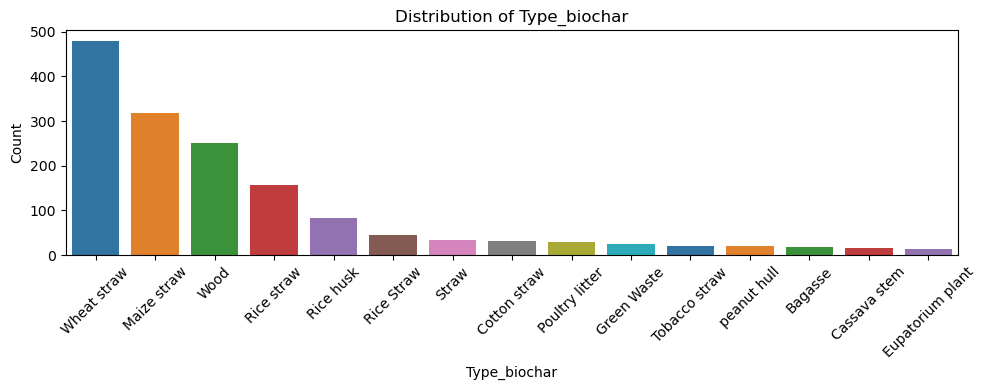

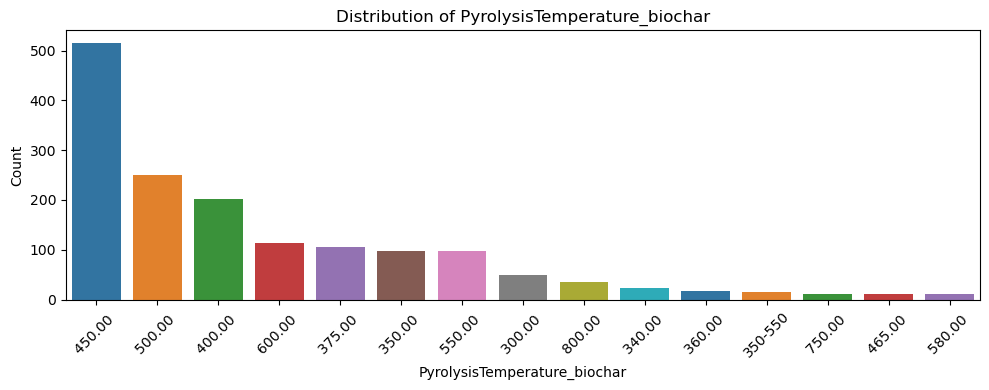

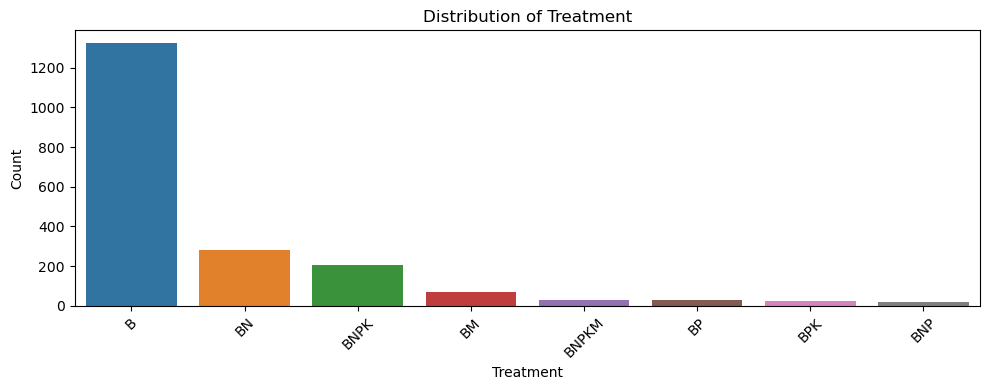

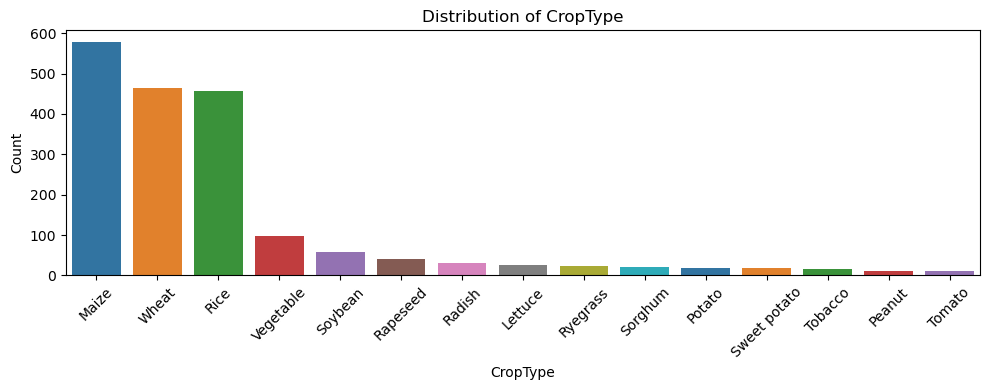

In [28]:
df_viz = df.copy()
df_viz = df_viz[df_viz['CropYield_T'].notnull()]

# List of categorical columns to visualize
object_cols = df_viz.select_dtypes(include='object').columns.tolist()

# Limit for categories to plot (to avoid overcrowding)
max_categories = 15

# Plot distribution of each categorical column
for col in object_cols:
    plt.figure(figsize=(10, 4))
    value_counts = df_viz[col].value_counts().head(max_categories)
    
    sns.barplot(x=value_counts.index, y=value_counts.values, palette='tab10')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [29]:
import pandas as pd
import numpy as np

# Function to handle outliers using the IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Keep nulls while filtering out outliers
    return df[(df[column].isna()) | ((df[column] >= lower_bound) & (df[column] <= upper_bound))]

# Apply IQR-based outlier removal cumulatively
df_no_outliers = remove_outliers_iqr(df, 'CropYield_T')
df_no_outliers = remove_outliers_iqr(df_no_outliers, 'GWP_T')

print(df_no_outliers.shape)
df = df_no_outliers


(2195, 56)


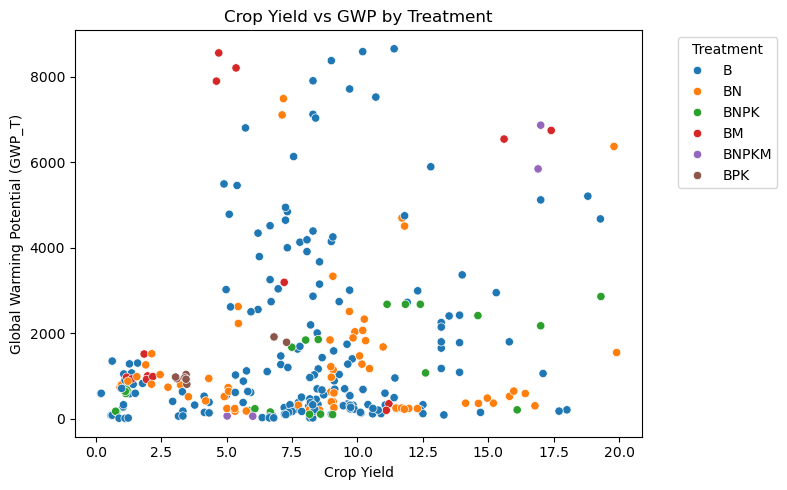

<Figure size 640x480 with 0 Axes>

In [30]:
# Make sure the necessary columns exist and have no missing values
plot_df = df[['CropYield_T', 'GWP_T', 'Treatment']].dropna()

# Create the scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=plot_df,
    x='CropYield_T',
    y='GWP_T',
    hue='Treatment',
    palette='tab10'
)

# Customize the plot
plt.title('Crop Yield vs GWP by Treatment')
plt.xlabel('Crop Yield')
plt.ylabel('Global Warming Potential (GWP_T)')
plt.legend(title='Treatment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show it
plt.show()
# Save the plot
plt.savefig("crp vs gwp.png") 

In [31]:


# Apply log transformation
df['GWP_T'] = np.log1p(df['GWP_T'])  # log1p handles zero values

# Target variables
target_yield = "CropYield_T"
target_gwp = "GWP_T"
targets = [target_yield, target_gwp]

# Features
features = df.columns.drop(targets)
if 'GHGI_T' in features:
    features = features.drop('GHGI_T')

# Build Preprocessor
def build_preprocessor(features):
    numeric_features = df[features].select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = df[features].select_dtypes(include=['object']).columns.tolist()

    numeric_transformer = Pipeline([
        ('imputer', KNNImputer(n_neighbors=5)),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

    return preprocessor

# Train Model Function
# Train Model Function
def train_model(X, y, features, multi_output=False):
    results = {}

    regressors = {
        "RandomForest": RandomForestRegressor(random_state=42),
        "GradientBoosting": GradientBoostingRegressor(random_state=42),
        "Ridge": Ridge()
    }

    param_distributions = {
        "RandomForest": {
            "regressor__estimator__n_estimators": randint(50, 200),
            "regressor__estimator__max_depth": randint(5, 12),
            "regressor__estimator__min_samples_split": randint(2, 10),
            "regressor__estimator__min_samples_leaf": randint(1, 5)
        },
        "GradientBoosting": {
            "regressor__estimator__n_estimators": randint(50, 200),
            "regressor__estimator__learning_rate": uniform(0.01, 0.2),
            "regressor__estimator__max_depth": randint(3, 7),
            "regressor__estimator__min_samples_split": randint(2, 10),
            "regressor__estimator__min_samples_leaf": randint(1, 5)
        },
        "Ridge": {
            "regressor__estimator__alpha": uniform(0.01, 10)
        }
    }


    for name, regressor in regressors.items():
        pipeline = Pipeline([
            ("preprocessor", build_preprocessor(features)),
            ("regressor", MultiOutputRegressor(regressor) if multi_output else regressor)
        ])

        search = RandomizedSearchCV(
            pipeline,
            param_distributions=param_distributions[name],
            n_iter=20,
            cv=KFold(n_splits=5, shuffle=True, random_state=42),
            scoring='r2',
            n_jobs=-1,
            random_state=42,
            verbose=2
        )

        search.fit(X, y)
        best_model = search.best_estimator_
        preds = best_model.predict(X)

        mse = mean_squared_error(y, preds)
        mae = mean_absolute_error(y, preds)
        rmse = mean_squared_error(y, preds, squared=False)
        r2 = r2_score(y, preds)

        results[name] = {
            "model": best_model,
            "R2": r2,
            "MSE": mse,
            "MAE": mae,
            "RMSE": rmse,
            "best_params": search.best_params_
        }

        print(f"{name} - R2: {r2:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")

    return results

# Final Data Splitting
df_final = df.dropna(subset=targets)
X = df_final[features]
y = df_final[targets]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Models
results = train_model(X_train, y_train, features, multi_output=True)

# Save Best Model using cloudpickle

best_model = max(results.items(), key=lambda x: x[1]['R2'])[1]['model']
with open("best_model_crop_gwp.pkl", "wb") as f:
    cloudpickle.dump(best_model, f)


# Test Set Evaluation
test_preds = best_model.predict(X_test)
test_r2 = r2_score(y_test, test_preds)
test_rmse = mean_squared_error(y_test, test_preds, squared=False)
test_mae = mean_absolute_error(y_test, test_preds)

print("\n🧪 Test Set Evaluation After Optimization")
print(f"  🔹 R²: {test_r2:.4f}")
print(f"  🔹 RMSE: {test_rmse:.4f}")
print(f"  🔹 MAE: {test_mae:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
RandomForest - R2: 0.9696, MAE: 0.3184, RMSE: 0.4840
Fitting 5 folds for each of 20 candidates, totalling 100 fits
GradientBoosting - R2: 0.9989, MAE: 0.0750, RMSE: 0.1007
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Ridge - R2: 0.8417, MAE: 0.8893, RMSE: 1.1635

🧪 Test Set Evaluation After Optimization
  🔹 R²: 0.6846
  🔹 RMSE: 1.6541
  🔹 MAE: 0.9274


In [32]:
# Save the cleaned dataset
df.to_csv("cleaned_features.csv", index=False)

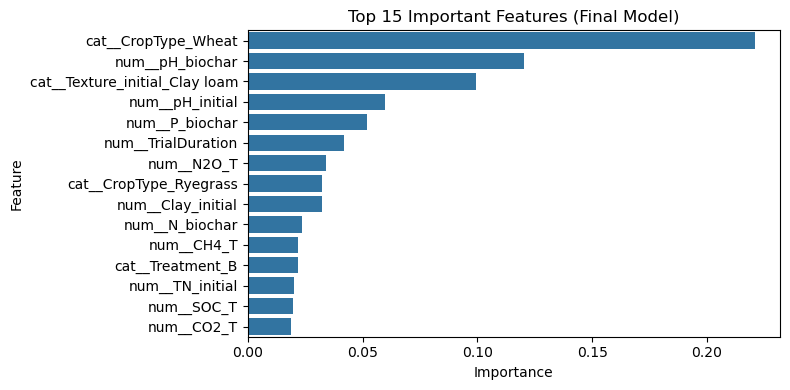

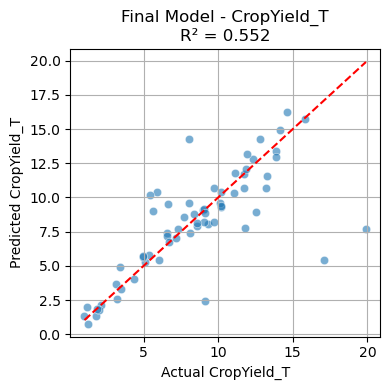

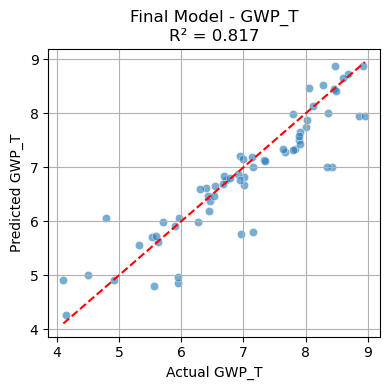

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# === Feature Importance (for GWP & Yield Multi-Output Model) ===
# Get first regressor (e.g., RandomForest) from MultiOutputRegressor
importances = best_model.named_steps['regressor'].estimators_[0].feature_importances_
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()

imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(8,4))
sns.barplot(x='Importance', y='Feature', data=imp_df)
plt.title("Top 15 Important Features (Final Model)")
plt.tight_layout()
plt.show()

# === Evaluation Plots ===
y_pred = best_model.predict(X_test)

# CropYield_T
plt.figure(figsize=(4, 4))
sns.scatterplot(x=y_test[target_yield], y=y_pred[:, 0], alpha=0.6)
plt.plot([y_test[target_yield].min(), y_test[target_yield].max()],
         [y_test[target_yield].min(), y_test[target_yield].max()], '--r')
plt.xlabel("Actual CropYield_T")
plt.ylabel("Predicted CropYield_T")
plt.title(f"Final Model - CropYield_T\nR² = {r2_score(y_test[target_yield], y_pred[:, 0]):.3f}")
plt.grid(True)
plt.tight_layout()
plt.show()

# GWP_T
plt.figure(figsize=(4, 4))
sns.scatterplot(x=y_test[target_gwp], y=y_pred[:, 1], alpha=0.6)
plt.plot([y_test[target_gwp].min(), y_test[target_gwp].max()],
         [y_test[target_gwp].min(), y_test[target_gwp].max()], '--r')
plt.xlabel("Actual GWP_T")
plt.ylabel("Predicted GWP_T")
plt.title(f"Final Model - GWP_T\nR² = {r2_score(y_test[target_gwp], y_pred[:, 1]):.3f}")
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
# Saving cleaned dataset to CSV
df.to_csv("cleaned_features.csv", index=False)


In [ ]:
!streamlit run app.py
